## Before you begin, learn to write equations under Jupyter Markdown mode

First, under "help" tab, click "Keyboard Shortcuts" to view shortcut operations, or click "Markdown" to view how to edit markdown cells.

To switch between "Markdown" mode or "code" mode, click a cell you want to change, then under the tool tab (which is right above this cell) click the dropdown option which is to the left of the "keyboard" icon. 

Click Ctrl + Enter to run any cell in any mode.

In jupyter you can write equations with Latex format. Simply type equations between two signs "$".

Double click the cell to view the source code. 



# Part I Basics: Broadcasting and sigmoid function

## Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [1]:
import numpy as np

In [3]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

In [4]:
a + b

array([5, 6, 7])

* If arrays are of same size, element to element operation takes place
* Because of broadcasting, scaler value 5 is converted into vector & ops takes place

In [5]:
a + 5

array([5, 6, 7])

In [6]:
a = np.array([ [1,2,3], [4,5,6] ])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
a + 5

array([[ 6,  7,  8],
       [ 9, 10, 11]])

<img src="https://github.com/awantik/PythonDataScienceHandbook/raw/f2c4a8af3f6e7e5f455469839e31b09ab6c22868/notebooks/figures/02.05-broadcasting.png">

In [8]:
a = np.arange(3).reshape(3,1)

In [9]:
a

array([[0],
       [1],
       [2]])

In [10]:
b = np.arange(3)

In [11]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Now lets initiate a matrix M and a vector a. Notice that the length of the vector a has to match the last dimension of M (or the dimension 1)

In [12]:
M = np.ones((2, 3))
a = np.arange(3)

In [13]:
M.shape, M

((2, 3),
 array([[1., 1., 1.],
        [1., 1., 1.]]))

In [14]:
a.shape

(3,)

In [15]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [16]:
a + M

array([[1., 2., 3.],
       [1., 2., 3.]])

In [17]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[4,5,6],[7,8,9]])



In [ ]:
# will this work? why?
a + b

won't work  

ValueError: operands could not be broadcast together with shapes (2,3) (3,3)   

The operation `a + b` will not work due to shape incompatibility.  

Here's why:  
- Shape of `a`: (2, 3) (2 rows × 3 columns)
- Shape of `b`: (3, 3) (3 rows × 3 columns)  

When performing element-wise operations (like addition) in NumPy, arrays must follow broadcasting rules.  

The key broadcasting rules are:
- Dimensions must match exactly.
- One (or both) dimension(s) must have size 1.  
  
In this case:  

- The second dimension (columns) matches (3 vs. 3).
- The first dimension (rows) has sizes 2 and 3, which are incompatible (neither is 1).  

As a result, NumPy cannot broadcast the arrays to a compatible shape. The operation will raise a ValueError indicating that the operands could not be broadcast together.

In [19]:
a = a.reshape(1,2,3)
b = b.reshape(3,1,3)

In [20]:
a, b

(array([[[1, 2, 3],
         [4, 5, 6]]]),
 array([[[1, 2, 3]],
 
        [[4, 5, 6]],
 
        [[7, 8, 9]]]))

In [21]:
# will this work? why?

a + b

array([[[ 2,  4,  6],
        [ 5,  7,  9]],

       [[ 5,  7,  9],
        [ 8, 10, 12]],

       [[ 8, 10, 12],
        [11, 13, 15]]])

Yes. It works.  

The operation `a + b` works because of NumPy's broadcasting rules.

1. **Shape of `a`**: (1, 2, 3)
2. **Shape of `b`**: (3, 1, 3)

Broadcasting allows the dimensions to be compatible by:
- **Third dimension** (size 3): Both arrays have this size, so no adjustment needed.
- **Second dimension** (size 1 in `b` and size 2 in `a`): The dimension of size `1` can be broadcast to `2`.
- **First dimension** (size 1 in `a` and size 3 in `b`): The dimension of size `1` can be broadcast to `3`.

After broadcasting, both arrays are expanded to shape **(3, 2, 3)**, enabling element-wise addition.

**Practice time !!**

First let M be a zero matrix of size 4 * 3, $a$ be an array of size (3, ) with elements ranging from 0 to 2, $b$ be an array of size (4, ) with elements ranging from 1 to 4. 

In [3]:
M = np.zeros((4,3))

a = np.arange(3)
b = np.arange(1,5)

In [4]:
print("零矩阵 M 是：")
print(M)
print("\n数组 a 是：")
print(a)
print("\n数组 b 是：")
print(b)

零矩阵 M 是：
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

数组 a 是：
[0 1 2]

数组 b 是：
[1 2 3 4]


Now, let's add $a$ to each row of M and assign the resulting matrix to N

In [5]:
N = M + a

In [6]:
print("\n矩阵 N 是：")
print(N)


矩阵 N 是：
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]


Finally, add $b$ to each column of N using broadcast. There are multiple ways to do it. You can try np.newaxis or reshape. 

In [8]:
N2 = N + b[ : , np.newaxis]
N3 = N + b.reshape(-1,1)

In [10]:
print("\n矩阵 N2 是：")
print(N2)
print("\n矩阵 N3 是：")
print(N3)


矩阵 N2 是：
[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]

矩阵 N3 是：
[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]
 [4. 5. 6.]]


## Sigmoid function and np.exp() function


**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="images/Sigmoid.png" style="width:500px;height:228px;">

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

**Exercise**: Implement the sigmoid function and its derivative using numpy. 

**Instructions**: When you call a function, say exponential on an array, numpy allows for element-wise operation over the whole array.
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [ ]:
# run this

a = np.random.rand(3) # This initiate an random arry

In [13]:
b = np.exp(a)
b

array([1.11498385, 1.21349362, 1.66362706])

In [14]:
# wrtie your code for sigmoid here



def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    
    return s

**Excercise** Define a class named My_Sigmoid Within the class, define two methods forward and backward. The forward method will take an input array $x$ and calculate its sigmoid transformation. The backward will calculate the derivative of sigmoid function at $x$

**Instruction** The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [ ]:
class My_Sigmoid:
    '''
    forward: compute the sigmoid(x) given x, x can be a list or a numpy array or a value, if x is a list, then perform element 
    wise transformation.
    
    backward: compute the derivative of sigmoid(x), using the fomula above
    
    '''
    def __init__(self, x):
        if x is None:
            self.y= 0
            self.dy = 0
        else:
            x = np.array(x)
            self.y = 1/(np.exp(-x) + 1)
            self.dy = self.y*(1-self.y)

    def forward(self, x):
        x = np.array(x)
        #######one line code here#######
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self, x):
        x = np.array(x)
        #######one line code here#######
        self.y = 1 / (1 + np.exp(-x))
        #######one line code here#######
        self.dy = self.y * (1 - self.y)
        
        
        return self.dy
        
    

In [17]:
# test:
mysigmoid= My_Sigmoid(x = None)

mysigmoid.forward([10, -10, 0, 2])
print(mysigmoid.y)
mysigmoid.backward([10, -10, 0, 2])

[9.99954602e-01 4.53978687e-05 5.00000000e-01 8.80797078e-01]


array([4.53958077e-05, 4.53958077e-05, 2.50000000e-01, 1.04993585e-01])

## Reshaping arrays

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

*Credit for the picture: Andrew Ng Deep Learning*

<img src="images/image2vector_kiank.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [18]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    v = image.reshape((image.shape[0] * image.shape[1] * image.shape[2], 1))
    
    return v




In [19]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

vectorized_image = image2vector(image)

print ("image2vector(image) = " + str(vectorized_image))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


**Exercise**: Implement `vector2image()` that takes the above vector and reshape it back to an image, but this time of the shape (length\*height ,depth).

In [25]:
def vector2image(vec, shape):
    """
    Argument:
    vec -- a flattened image vector of shape (length*height*depth, 1)
    shape -- a array indicating desired shape
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    image = vec.reshape((shape[0] * shape[1], shape[2]))
    
    return image

In [26]:
# call the function, fill in the right shape

image_new = vector2image(vectorized_image, shape = [3, 3, 2])
print ("vector2image(vectorized_image ) = " + str(image_new))

vector2image(vectorized_image ) = [[0.67826139 0.29380381]
 [0.90714982 0.52835647]
 [0.4215251  0.45017551]
 [0.92814219 0.96677647]
 [0.85304703 0.52351845]
 [0.19981397 0.27417313]
 [0.60659855 0.00533165]
 [0.10820313 0.49978937]
 [0.34144279 0.94630077]]


# Part II Logistic Regression with a Neural Network mindset

This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.


Implement  a gradient descent algorithm for logistic regression. This data are taken from a larger dataset, described in a South African Medical Journal.

**Dataset: Use the following dataset for the implementation.**

The full data is available at: http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/ For this project, you can use those located under in the folder. 


#### Description
A retrospective sample of males in a heart-disease high-risk region of South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases, the measurements were made after these treatments.
 
### Steps to implement

*	Encode the categorical variables.
*	Normalize the numerical variables
*	Randomly initialize beta values
*	Define a sigmoid function to predict Y
* Define a function for calculating binary cross entropy loss function 
* Define a function for updating beta values. The derivative term is same as derivative term for the linear regression as discussed in the class.
* Write the code for gradient descent iterations.
* Plot the cost function for different alpha (learning parameters) values.
* Use sklearn logistic regression API and compare the estimation of beta values.


### Important! 

Read the codes and comments carefully. You may need to fill in the code when you see "################finish the code below##################" in the comment line. Do not miss them.


## 1 - Packages ##


If you don't have those packages, try pip/conda install *-insert package name-*

In [1]:
#Load required libraries
import pandas as pd
import numpy as np
import math

%matplotlib inline

## 2 - Overview of the Problem set ##




In [ ]:
#load SAHeart csv file
path1 = r"path/SAHeart.csv" #运行时需更新为实际本地路径
SAHeart_df = pd.read_csv(path1)

In [3]:
SAHeart_df.head(10)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


## 3 - Process variables ##

### Convert 'famhis' to dummies

In [4]:
SAHeart_df['famhist']= pd.get_dummies(SAHeart_df['famhist'],drop_first = "true", dtype='uint8')

# 和checkpoint作比较后加了unit8, 否则输出bool值

In [5]:
SAHeart_df.head(10)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,1,69,30.11,0.00,53,1


In [6]:
X = (SAHeart_df[['famhist','sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']])

In [7]:
X[0:5]


,famhist,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52
1,0,144,0.01,4.41,28.61,55,28.87,2.06,63
2,1,118,0.08,3.48,32.28,52,29.14,3.81,46
3,1,170,7.50,6.41,38.03,51,31.99,24.26,58
4,1,134,13.60,3.50,27.78,60,25.99,57.34,49


In [8]:
Y = np.array(SAHeart_df[['chd']])
#Y = (SAHeart_df[['chd']])
#print(len(Y))

In [9]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [10]:
cols_to_Normal = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

X_new= X[cols_to_Normal]
X_new.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
5,132,6.20,6.47,36.21,62,30.77,14.14,45
6,142,4.05,3.38,16.20,59,20.81,2.62,38
7,114,4.08,4.59,14.60,62,23.11,6.72,58
8,114,0.00,3.83,19.40,49,24.86,2.49,29
9,132,0.00,5.80,30.96,69,30.11,0.00,53


#### Normalise the dimension

In [11]:
X_new = X_new[cols_to_Normal].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)

In [12]:
type(X_new)

pandas.core.frame.DataFrame

In [13]:
X_new['famhist'] = SAHeart_df['famhist']

In [14]:
X_new.head(10)


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
0,1.057417,1.821099,0.477894,-0.295183,-0.418017,-0.176594,3.274189,0.628654,1
1,0.276789,-0.789382,-0.159507,0.411694,0.193134,0.670646,-0.612081,1.381617,0
2,-0.991731,-0.774141,-0.608585,0.883374,-0.112441,0.734723,-0.540597,0.217947,1
3,1.545310,0.841352,0.806252,1.622382,-0.214300,1.411091,0.294742,1.039361,1
4,-0.211103,2.169453,-0.598928,0.305020,0.702427,-0.012842,1.645991,0.423301,1
5,-0.308682,0.558314,0.835225,1.388470,0.906144,1.121558,-0.118638,0.149496,1
6,0.179211,0.090213,-0.656873,-1.183278,0.600569,-1.242171,-0.589206,-0.329662,0
7,-1.186888,0.096745,-0.072589,-1.388915,0.906144,-0.696330,-0.421730,1.039361,1
8,-1.186888,-0.791559,-0.439577,-0.772004,-0.418017,-0.281016,-0.594517,-0.945722,1
9,-0.308682,-0.791559,0.511696,0.713724,1.619154,0.964925,-0.696228,0.697105,1


In [15]:
list(X_new)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist']

In [16]:
X_new = np.array(X_new)
X_new[0:5]

array([[ 1.05741729,  1.8210988 ,  0.47789413, -0.29518321, -0.41801699,
        -0.17659445,  3.27418871,  0.62865426,  1.        ],
       [ 0.27678925, -0.78938174, -0.15950708,  0.41169419,  0.19313443,
         0.67064592, -0.61208112,  1.38161701,  0.        ],
       [-0.99173133, -0.77414124, -0.6085852 ,  0.8833742 , -0.11244128,
         0.73472292, -0.54059729,  0.2179473 ,  1.        ],
       [ 1.54530982,  0.84135214,  0.80625232,  1.62238239, -0.21429985,
         1.41109128,  0.2947424 ,  1.03936121,  1.        ],
       [-0.21110328,  2.16945317, -0.59892761,  0.30501996,  0.70242729,
        -0.01284211,  1.64599115,  0.42330078,  1.        ]])

## 4- Randomly Initialising values of beta coefficient ## 

In [17]:
import random

In [18]:
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 


In [19]:
b,w = initialize_betas(X_new.shape[1])
print(b,w)

0.4620291418562038 [0.29560011 0.73996583 0.90963315 0.54134988 0.05951375 0.35888926
 0.77794304 0.76841869 0.29892462]


In [20]:
w.shape

(9,)

## 5- Define a sigmoid function to predict Y ##

In [21]:
def sigmoid(b, w ,X_new):
    '''
    Z= wx+b
    '''
    
    ##############finish the code here#####################
    Z = np.dot(X_new, w) + b
    Sigmoid_Z = 1 / (1 + np.exp(-Z))
    return  Sigmoid_Z

In [22]:
y_hat = sigmoid(b,w,X_new)

y_hat[0:5]

array([0.99645242, 0.70582408, 0.45598877, 0.99312946, 0.97253906])

In [23]:

Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [24]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

## 6- Define a function for calculating binary cross entropy loss function ##

In [25]:
def get_cost( y, y_hat):
    
    '''
    Input: y: a vector of true labels, y_hat: a vector of predicted outcome from logistic regression
    Return: the value of cost or loss function
    Loss function L = -1/m\Sigma (y log y_hat + (1-y)log 1-y_hat)
    
    
    '''
    
    ### finish the code here
    m = len(y)
    loss = - (1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    
    return loss

In [26]:
# Reshape Y
Y=Y.reshape(len(Y), )
current_cost= get_cost(Y,y_hat)
#print(current_cost)
Y.shape, y_hat.shape

((462,), (462,))

In [27]:
X_new.shape

(462, 9)

## 7- Define a function for updating w and b using backpropagation

In [65]:
# write backpropagation function here

def backprop (b_0, w_0 , y , y_hat, X_new, alpha = 0.1):
    '''
    Input: weight to be updated b_0, and w_0, as well as y and y_hat to calculate dz (defined as dL/dz)
    output: new updated b_0 and w_0
    
    
    '''
    
    dz = y_hat-y
    ########finish the code here, to calculate db defined as dL/db

    m = X_new.shape[0]
    
    db = (1 / m) * np.sum(dz)
    
    # update b_0
    b_0 = b_0 - alpha * db
    
    
    ########finish the code here, , to calculate db defined as dL/db
    dw = (1 / m) * np.dot(X_new.T, dz)
    
    #update w_0
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0
    

In [66]:
X_new.shape

(462, 9)

In [67]:
alpha = 0.1

type(y_hat)
#(X_new).shape

numpy.ndarray

In [68]:
b,w = backprop (b, w, Y, y_hat,X_new, alpha)

b.shape

()

In [69]:
b

-1.2628591785443852

In [70]:
#print(b,w)
w

array([ 0.13328196,  0.36452443,  0.36025155,  0.14387359,  0.38868162,
       -0.26453297,  0.00302582,  0.66106879,  0.92492791])

##  8- Finally, let's try the gradient descent!


In [71]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)


initial guess of b and w:  0.10068278504311678 [0.16161311 0.13577227 0.31933617 0.12745551 0.66799098 0.15746881
 0.60328091 0.11376943 0.20606248]


In [72]:
for each_iter in range (num_iterations ):
    ###### finish the code below
    y_hat = sigmoid(b, w, X_new)
    current_cost = get_cost(Y, y_hat)
    prev_b = b
    prev_w = w
    b, w = backprop(b, w, Y, y_hat, X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
# print("Final estimates of b and q are: ", b,w) ←我觉得这个q不对，应该是w
print("Final estimates of b and w are: ", b,w)

Iteration:  0 Cost:  0.6986445297937693
Iteration:  10 Cost:  0.5491971175942864
Iteration:  20 Cost:  0.5275723390382866
Iteration:  30 Cost:  0.5212475375721342
Iteration:  40 Cost:  0.5179315160620384
Iteration:  50 Cost:  0.5158222718685285
Iteration:  60 Cost:  0.514396633014354
Iteration:  70 Cost:  0.5134085456397346
Iteration:  80 Cost:  0.5127144464850214
Iteration:  90 Cost:  0.5122227452684441
Iteration:  100 Cost:  0.5118724177266623
Iteration:  110 Cost:  0.5116217787120777
Iteration:  120 Cost:  0.5114418980341733
Iteration:  130 Cost:  0.5113124814375866
Iteration:  140 Cost:  0.511219185062426
Iteration:  150 Cost:  0.511151814964303
Iteration:  160 Cost:  0.511103096444111
Iteration:  170 Cost:  0.5110678213119274
Iteration:  180 Cost:  0.511042251207359
Iteration:  190 Cost:  0.5110236970701383
Iteration:  200 Cost:  0.5110102211412377
Iteration:  210 Cost:  0.5110004248982557
Iteration:  220 Cost:  0.5109932976344964
Iteration:  230 Cost:  0.5109881080412687
Iteratio

## 9- Let's validate our result against sklearn logistic regression API

In [73]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [74]:
lmodel.intercept_

array([-1.23623307])

In [75]:
lmodel.coef_

array([[ 0.13249594,  0.36074563,  0.35615923,  0.14242442,  0.37964323,
        -0.25524232,  0.00443547,  0.64963333,  0.88060142]])

## 10- Visualization using matplotlib

In [76]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

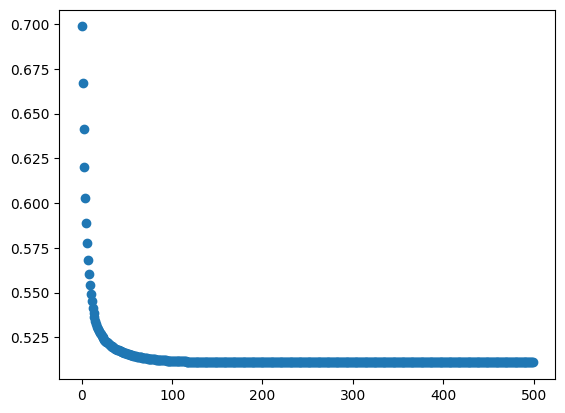

In [77]:
plt.scatter( range(num_iterations), all_costs)

#len(range(each_iter))

### Gradient descent is converging correctly for 500 iterations and with learning rate =0.5

## 11- Tuning learning rate alpha

current learning rate is 0.01
initial guess of b and w:  0.9620432357360591 [0.38220595 0.0477295  0.19476365 0.86807253 0.64828036 0.17327088
 0.5069513  0.09935706 0.46548836]
Iteration:  0 Cost:  0.996725800733059
Iteration:  30 Cost:  0.9501133159729248
Iteration:  60 Cost:  0.9068080160197557
Iteration:  90 Cost:  0.8668007887694986
Iteration:  120 Cost:  0.8300581754315028
Iteration:  150 Cost:  0.7965187696857765
Iteration:  180 Cost:  0.766091174531342
Iteration:  210 Cost:  0.7386538729041888
Iteration:  240 Cost:  0.7140571873811487
Iteration:  270 Cost:  0.6921272409028938
Iteration:  300 Cost:  0.6726715382507835
Iteration:  330 Cost:  0.6554855481137735
Iteration:  360 Cost:  0.6403595515572412
Iteration:  390 Cost:  0.6270850637873879
Iteration:  420 Cost:  0.615460304557988
Iteration:  450 Cost:  0.6052944227070075
Iteration:  480 Cost:  0.5964104028506418
Iteration:  510 Cost:  0.5886467509613496
Iteration:  540 Cost:  0.5818581549260747
Iteration:  570 Cost:  0.5759153

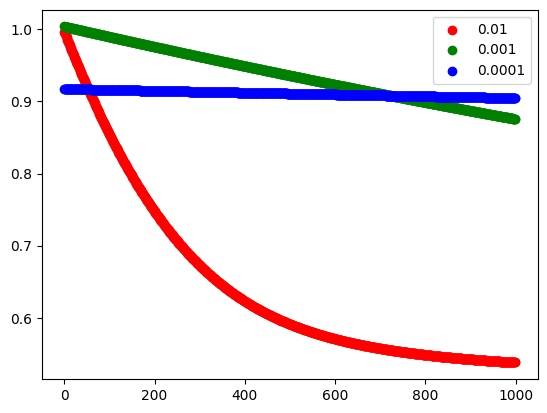

In [83]:
####plot the cost function for different alpha values, 0.01,0.001,0.0001

# For alpha =0.01

alphas = [0.01, 0.001, 0.0001]
num_iterations = 1000
colors = ['r', 'g', 'b']
for i, alpha in enumerate(alphas):
    print(f'current learning rate is {alpha}')

    all_costs = []
    b,w = initialize_betas(X_new.shape[1])
    print("initial guess of b and w: " , b ,w)

    for each_iter in range (num_iterations ):
        ################finish the code below##################
        y_hat = sigmoid(b, w, X_new)
        current_cost = get_cost(Y, y_hat)
        prev_b = b
        prev_w = w
        
        ################finish the code below##################
        b, w =  backprop(b, w, Y, y_hat, X_new, alpha)
        all_costs.append(current_cost)
        if each_iter % 30 == 0:
            print('Iteration: ', each_iter, 'Cost: ', current_cost)
            each_iter += 1

    #print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
    #print("Final estimates of b and q are: ", b,w) 感觉不是q，应该是w
    print("Final estimates of b and w are: ", b,w)
    plt.scatter( range(num_iterations), all_costs, c = colors[i], label = f'{alpha}')
    plt.legend()

According to the experiment above, which is the best choice for alpha? Why?

**Answer Below**:  
I think it should be the green line, whose alpha = 0.001.  

Based on the experiment above, the best choice for the learning rate alpha should be 0.001 depending on the trade-off we want to achieve between convergence speed and stability during the model training process. Here's an analysis of the different learning rates and the recommended option:

### Best Choice for Alpha and Why:

1. **Learning Rate = 0.01 (Red Curve):**
   - **Advantages:** This learning rate offers the fastest convergence speed, with large parameter updates that quickly reduce the cost value.
   - **Disadvantages:** Due to the large update size, it may cause the model to oscillate around the optimal solution, sometimes failing to converge to the global optimum. Additionally, a learning rate that is too high can lead to instability during training.

2. **Learning Rate = 0.001 (Green Curve):**
   - **Advantages:** This learning rate provides a good compromise. It ensures the model converges at a reasonable speed while maintaining a certain level of stability, reducing oscillations around the minimum.
   - **Disadvantages:** Compared to 0.01, its convergence speed is slower, requiring more iterations to reach a similar cost value.

3. **Learning Rate = 0.0001 (Blue Curve):**
   - **Advantages:** This learning rate provides the most stable training process, with a smooth decrease in cost and minimal oscillation.
   - **Disadvantages:** The convergence speed is very slow, requiring a large number of iterations to reach cost values similar to those with other learning rates, potentially leading to low training efficiency.

#### Recommended Learning Rate:

Based on the experimental results, **0.001 (Green Curve)** might be a better choice. Here's why:

- **Balanced Convergence Speed:** Although not as fast as 0.01, it can still reach a lower cost value in a reasonable amount of time.
- **Stability:** Compared to 0.01, 0.001 offers a more stable training process, reducing oscillation and helping the model converge to a better solution.
- **Avoids Excessively Slow Training:** While 0.0001 provides the most stable training process, its excessively slow convergence speed can result in inefficient training, whereas 0.001 offers a good balance between stability and speed.

### Conclusion:

Considering both convergence speed and training stability, **0.001** is a reasonable choice for the learning rate. It ensures stability in the model training process while providing acceptable convergence speed. Of course, the optimal learning rate can also depend on the specific problem and dataset characteristics, so further adjustments and optimizations might be needed in practical applications.